<a href="https://colab.research.google.com/github/wamo12/FinRL/blob/master/capstoneXGBoostBTCproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## XGBoost for Bitcoin Time Series Price Prediction

**Executive Summary**  
This white paper presents a comprehensive methodology and evaluation of using XGBoost, a state-of-the-art tree-based ensemble learning algorithm, for Bitcoin (BTC) time series price prediction. The approach integrates technical analysis indicators and exogenous macroeconomic variables, employs robust preprocessing and feature engineering, and leverages advanced interpretability tools such as SHAP values. The results demonstrate that XGBoost offers superior accuracy, scalability, and robustness compared to traditional models, making it a preferred choice for cryptocurrency price forecasting in volatile and complex markets.

---

## 1. Introduction

Bitcoin price prediction is a challenging task due to the asset's inherent volatility, nonlinearity, and sensitivity to both technical and macroeconomic factors. Traditional regression models, such as Support Vector Regression (SVR), often struggle with these complexities. XGBoost, with its ensemble learning and regularization capabilities, addresses these challenges effectively, especially when handling large datasets with diverse features.

---

## 2. Methodology

**2.1 Data Sources and Scope**  
- **Dataset**: 5-year historical BTC price data (2019-04-09 to 2024-05-06) sourced from Kaggle.
- **Features**:  
  - Technical indicators: EMA, MACD, RSI, and their lagged versions (1, 3, 7 days).
  - Exogenous variables: USDEUR currency rate (typically negatively correlated to BTC), silver futures (higher volatility and better BTC correlation than gold), S&P 500 index, and US dollar futures.

**2.2 Preprocessing and Outlier Handling**  
- Outliers in financial time series can distort model learning. The pipeline combines statistical detection methods (rolling z-score, IQR, STL) with domain knowledge to identify and adjust anomalies, ensuring the model focuses on underlying patterns rather than rare events.

**2.3 Feature Engineering**  
- Created EMA crossover differentials (EMA20_50_diff) and MACD crossover signals (MACD_Cross).
- Robust scaling and outlier clipping precede standardization to enhance model reliability.
- Comprehensive lag structure for all technical and exogenous features.

**2.4 Model Architecture and Optimization**  
- XGBoost with increased capacity (max_depth=7), regularization (gamma, reg_alpha/lambda), and GPU acceleration for scalability.
- Hybrid Forecasting Class enables multi-step forecasting by combining direct and recursive strategies: a separate model is trained for each forecast horizon, and predictions are recursively fed as inputs for subsequent steps.

**2.5 Model Validation**  
- Temporal (time-based) train-test split ensures realistic evaluation and avoids look-ahead bias, closely mimicking real-world forecasting scenarios.

---

## 3. Interpretability: SHAP Analysis

**3.1 SHAP Values**  
- SHAP (SHapley Additive exPlanations) values quantify the contribution of each feature to individual predictions and provide both global and local interpretability.
- SHAP dependence plots reveal non-linear relationships, feature interactions, and threshold effects, making model behavior transparent and actionable for both technical and non-technical stakeholders.

**3.2 Example Insights**  
- Dependence plots for indicators like RSI14 can uncover threshold effects (e.g., RSI > 70 signals overbought conditions) and interactions with other features (e.g., MACD), supporting model debugging and further feature engineering.

---

## 4. Experimental Results

**4.1 Performance Metrics**  
- **Mean Absolute Error (MAE)**: 1,777.40
- **R² Score**: 0.96
- **Mean Absolute Percentage Error (MAPE)**: 3.82%
- Typical R² scores in similar studies: 0.85–0.92 when models are properly tuned.

**4.2 Comparative Advantage**  
- XGBoost consistently outperforms SVR and other traditional models in terms of predictive accuracy and robustness, particularly in large, high-frequency, and volatile datasets typical of cryptocurrency markets.

---

## 5. Best Practices and Guidelines

**5.1 Time Series Length**  
- Minimum 3 years (1,095 daily bars) to capture Bitcoin’s ~4-year halving cycles and bull/bear trends.
- For regime-switching models and robustness to black swan events, 8+ years is recommended.
- For high-frequency data (minute/hourly), 1–2 years (500k–1M+ data points) is optimal; for daily, 3–5 years (1,000–1,800 points).

**5.2 Computational Considerations**  
- XGBoost efficiently handles large datasets, but GPU acceleration is essential beyond 5 million rows.
- For minute-level data, 6–12 months (~250k–500k rows) balances granularity and training time.

---

## 6. Conclusion

XGBoost, when combined with robust preprocessing, comprehensive feature engineering, and advanced interpretability tools like SHAP, provides a powerful framework for Bitcoin price prediction. Its ability to handle large, complex, and volatile datasets, along with its superior predictive accuracy and transparency, makes it a preferred model for practitioners and researchers in the cryptocurrency domain.

---
## 7. Future Consideration





When modeling Bitcoin price with XGBoost, future research should prioritize advanced feature engineering by incorporating on-chain metrics, social sentiment, and macroeconomic indicators, as well as volatility and regime-switching signals. Hybrid modeling approaches that combine XGBoost with deep learning or probabilistic forecasting can further enhance predictive performance and risk assessment. Robust validation—such as walk-forward and regime-specific testing—should be standard, alongside dynamic retraining strategies to address non-stationarity. Operationally, low-latency deployment and ongoing model monitoring are essential for real-world trading applications. Finally, ethical considerations, including explainability and bias mitigation, are critical for responsible and compliant deployment of machine learning models in financial markets.


**1. Import Libraries**

In [ ]:
!pip install --upgrade --no-cache-dir numpy==1.23.5 pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 81.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 298.0 MB/s eta 0:00:00
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=626f9e4483b602b45404edf4abf5aa4946ab387780f8f36db01a4ad982efeb26
  Stored in directory: /tmp/pip-ephem-wheel-cache-yaaapw5b/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas_ta
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is inco

**It may be required to restart runtime or restart session in order to use newly installed versions**

In [ ]:
# Required libraries
import pandas as pd
import numpy as np
import os

# matplotlib libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Technical analysis Indicators library
import pandas_ta as ta

# model libraries
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

import shap # provides insight into how much each feature contributes to a model's prediction

from sklearn.model_selection import TimeSeriesSplit
from sklearn.multioutput import MultiOutputRegressor


import statsmodels
from statsmodels.tools.eval_measures import rmse

#date libraries
from dateutil import parser
from datetime import datetime, timedelta, date





**2.Ignore warnings**

In [ ]:
# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings('ignore')

**3. Set Options**

In [ ]:
#pandas options
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

**4. Read Data and DataFrames preparation**

In [ ]:
df=pd.read_csv("/content/BTC-USD.csv")
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,3746.71,3850.91,3707.23,3843.52,3843.52,4324200990
1,2019-01-02,3849.22,3947.98,3817.41,3943.41,3943.41,5244856836
2,2019-01-03,3931.05,3935.69,3826.22,3836.74,3836.74,4530215219
3,2019-01-04,3832.04,3865.93,3783.85,3857.72,3857.72,4847965467
4,2019-01-05,3851.97,3904.90,3836.90,3845.19,3845.19,5137609824
...,...,...,...,...,...,...,...
1948,2024-05-02,58253.70,59602.30,56937.20,59123.43,59123.43,32711813559
1949,2024-05-03,59122.30,63320.50,58848.31,62889.84,62889.84,33172023048
1950,2024-05-04,62891.03,64494.96,62599.35,63891.47,63891.47,20620477992
1951,2024-05-05,63892.45,64610.89,62955.30,64031.13,64031.13,18296164805


In [ ]:
# drop 'Adj Close'column not used in the model

columns_to_drop = [
        'Adj Close',]

# Only drop columns that actually exist
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Rename "Date" column to "timestamp" for model specification and to adjoin datasets
df = df.rename(columns={ "Date":"timestamp"})

##-- convert column to str
df.columns = df.columns.str.replace(' ', '_').str.lower()

##--convert date to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

df_BTC=df.copy()
df_BTC

,timestamp,open,high,low,close,volume
0,2019-01-01,3746.71,3850.91,3707.23,3843.52,4324200990
1,2019-01-02,3849.22,3947.98,3817.41,3943.41,5244856836
2,2019-01-03,3931.05,3935.69,3826.22,3836.74,4530215219
3,2019-01-04,3832.04,3865.93,3783.85,3857.72,4847965467
4,2019-01-05,3851.97,3904.90,3836.90,3845.19,5137609824
...,...,...,...,...,...,...
1948,2024-05-02,58253.70,59602.30,56937.20,59123.43,32711813559
1949,2024-05-03,59122.30,63320.50,58848.31,62889.84,33172023048
1950,2024-05-04,62891.03,64494.96,62599.35,63891.47,20620477992
1951,2024-05-05,63892.45,64610.89,62955.30,64031.13,18296164805


In [ ]:
df_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1953 non-null   datetime64[ns]
 1   open       1953 non-null   float64       
 2   high       1953 non-null   float64       
 3   low        1953 non-null   float64       
 4   close      1953 non-null   float64       
 5   volume     1953 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 91.7 KB


In [ ]:
df_1=pd.read_csv('EURUSD=X.csv')
df_1

,date,eurusd=x_close
0,2018-06-03,1.17
1,2018-06-04,1.17
2,2018-06-05,1.17
3,2018-06-06,1.18
4,2018-06-07,1.18
...,...,...
1822,2025-05-27,1.13
1823,2025-05-28,1.12
1824,2025-05-29,1.14
1825,2025-06-01,1.14


In [ ]:
# Rename "date" column to "timestamp"
df_1 = df_1.rename(columns={ "date":"timestamp"})

##-- convert column to str
df_1.columns = df_1.columns.str.replace(' ', '_').str.lower()

##--convert date to datetime
df_1['timestamp'] = pd.to_datetime(df_1['timestamp'])

# drop rows with NaNs in any  of the DataFrame

# List columns
cols = ['timestamp',	'eurusd=x_close']

# Drop rows where any technical indicator is NaN
df_clean = df_1.dropna(subset=cols)

# Optional: Reset index after dropping rows
df_clean = df_clean.reset_index(drop=True)

# Rename closing price column
df_clean=df_clean.rename(columns={'eurusd=x_close':'eurusd_close'})

df_EURUSD=df_clean.copy()
df_EURUSD













,timestamp,eurusd_close
0,2018-06-03,1.17
1,2018-06-04,1.17
2,2018-06-05,1.17
3,2018-06-06,1.18
4,2018-06-07,1.18
...,...,...
1818,2025-05-27,1.13
1819,2025-05-28,1.12
1820,2025-05-29,1.14
1821,2025-06-01,1.14


In [ ]:
df_2=pd.read_csv('SI=F.csv')
df_2

,date,si=f_close
0,2018-06-04,16.38
1,2018-06-05,16.49
2,2018-06-06,16.64
3,2018-06-07,16.77
4,2018-06-08,16.69
...,...,...
1758,2025-05-28,33.00
1759,2025-05-29,33.28
1760,2025-05-30,32.89
1761,2025-06-02,34.56


In [ ]:
# Rename "date" column to "timestamp"
df_2 = df_2.rename(columns={ "date":"timestamp"})

##-- convert column to str
df_2.columns = df_2.columns.str.replace(' ', '_').str.lower()

##--convert date to datetime
df_2['timestamp'] = pd.to_datetime(df_2['timestamp'])

# drop rows with NaNs in any  of the DataFrame

# List columns
cols = ['timestamp',	'si=f_close']

# Drop rows where any technical indicator is NaN
df_2_clean = df_2.dropna(subset=cols)

# Optional: Reset index after dropping rows
df_2_clean = df_2_clean.reset_index(drop=True)

# Rename closing price column
df_2_clean=df_2_clean.rename(columns={'si=f_close':'Si_close'})

df_SI=df_2_clean.copy()
df_SI

,timestamp,Si_close
0,2018-06-04,16.38
1,2018-06-05,16.49
2,2018-06-06,16.64
3,2018-06-07,16.77
4,2018-06-08,16.69
...,...,...
1756,2025-05-28,33.00
1757,2025-05-29,33.28
1758,2025-05-30,32.89
1759,2025-06-02,34.56


In [ ]:
df_3=pd.read_csv('^GSPC.csv')
df_3

,date,gspc_close
0,2018-06-04,2746.87
1,2018-06-05,2748.80
2,2018-06-06,2772.35
3,2018-06-07,2770.37
4,2018-06-08,2779.03
...,...,...
1755,2025-05-28,5888.55
1756,2025-05-29,5912.17
1757,2025-05-30,5911.69
1758,2025-06-02,5935.94


In [ ]:
# Rename "date" column to "timestamp"
df_3 = df_3.rename(columns={ "date":"timestamp"})

##-- convert column to str
df_3.columns = df_3.columns.str.replace(' ', '_').str.lower()

##--convert date to datetime
df_3['timestamp'] = pd.to_datetime(df_3['timestamp'])



df_GSPC=df_3.copy()
df_GSPC

,timestamp,gspc_close
0,2018-06-04,2746.87
1,2018-06-05,2748.80
2,2018-06-06,2772.35
3,2018-06-07,2770.37
4,2018-06-08,2779.03
...,...,...
1755,2025-05-28,5888.55
1756,2025-05-29,5912.17
1757,2025-05-30,5911.69
1758,2025-06-02,5935.94


In [ ]:
df_4=pd.read_csv('DX=F.csv')
df_4

,date,dx=f_close
0,2018-06-04,93.99
1,2018-06-05,93.87
2,2018-06-06,93.63
3,2018-06-07,93.38
4,2018-06-08,93.54
...,...,...
1758,2025-05-28,99.79
1759,2025-05-29,99.21
1760,2025-05-30,99.26
1761,2025-06-02,98.64


In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1763 non-null   object 
 1   dx=f_close  1763 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.7+ KB


In [ ]:
# Rename "date" column to "timestamp"
df_4 = df_4.rename(columns={ "date":"timestamp"})

##-- convert column to str
df_4.columns = df_4.columns.str.replace(' ', '_').str.lower()

##--convert date to datetime
df_4['timestamp'] = pd.to_datetime(df_4['timestamp'])

# Rename closing price column
df_4=df_4.rename(columns={'dx=f_close':'dx_close'})

df_DX=df_4.copy()
df_DX

,timestamp,dx_close
0,2018-06-04,93.99
1,2018-06-05,93.87
2,2018-06-06,93.63
3,2018-06-07,93.38
4,2018-06-08,93.54
...,...,...
1758,2025-05-28,99.79
1759,2025-05-29,99.21
1760,2025-05-30,99.26
1761,2025-06-02,98.64


**5.Merge DataFrames on Timestamp**

To effectively merge the Bitcoin time series DataFrame (df_BTC) with Silver and EUR/USD DataFrames for modeling (e.g., using XGBoost), one must ensure all data is synchronized by timestamp. This is a fundamental step in time series forecasting, particularly when incorporating external variables like macroeconomic indicators or commodity prices

In [ ]:
# Sort values by timestamp

df_BTC = df_BTC.sort_values('timestamp')
df_EURUSD = df_EURUSD.sort_values('timestamp')
df_SI =df_SI.sort_values('timestamp')
df_GSPC=df_GSPC.sort_values('timestamp')
df_DX=df_DX.sort_values('timestamp')

# Merge DataFrames on Timestamp

# If timestamps do not match exactly (e.g., some missing days), use merge_asof for nearest previous alignment
merged_df = pd.merge_asof(df_BTC, df_EURUSD, on='timestamp', direction='backward')
merged_df = pd.merge_asof(merged_df, df_SI, on='timestamp', direction='backward')
merged_df = pd.merge_asof(merged_df, df_GSPC, on='timestamp', direction='backward')
merged_df = pd.merge_asof(merged_df, df_DX, on='timestamp', direction='backward')

# Sort the merged DataFrame by timestamp
merged_df = merged_df.sort_values('timestamp')

merged=merged_df.copy()
merged




,timestamp,open,high,low,close,volume,eurusd_close,Si_close,gspc_close,dx_close
0,2019-01-01,3746.71,3850.91,3707.23,3843.52,4324200990,1.15,15.43,2506.85,95.74
1,2019-01-02,3849.22,3947.98,3817.41,3943.41,5244856836,1.15,15.54,2510.03,96.42
2,2019-01-03,3931.05,3935.69,3826.22,3836.74,4530215219,1.13,15.71,2447.89,95.88
3,2019-01-04,3832.04,3865.93,3783.85,3857.72,4847965467,1.14,15.69,2531.94,95.75
4,2019-01-05,3851.97,3904.90,3836.90,3845.19,5137609824,1.14,15.69,2531.94,95.75
...,...,...,...,...,...,...,...,...,...,...
1948,2024-05-02,58253.70,59602.30,56937.20,59123.43,32711813559,1.07,26.58,5064.20,105.18
1949,2024-05-03,59122.30,63320.50,58848.31,62889.84,33172023048,1.07,26.44,5127.79,104.92
1950,2024-05-04,62891.03,64494.96,62599.35,63891.47,20620477992,1.07,26.44,5127.79,104.92
1951,2024-05-05,63892.45,64610.89,62955.30,64031.13,18296164805,1.08,26.44,5127.79,104.92


In [ ]:
# Data Preparation

# Rename the column
merged = merged.rename(columns={ "timestamp": "date"})
merged['date'] = pd.to_datetime(merged['date'])
merged.set_index('date', inplace=True)
merged

,open,high,low,close,volume,eurusd_close,Si_close,gspc_close,dx_close
date,,,,,,,,,
2019-01-01,3746.71,3850.91,3707.23,3843.52,4324200990,1.15,15.43,2506.85,95.74
2019-01-02,3849.22,3947.98,3817.41,3943.41,5244856836,1.15,15.54,2510.03,96.42
2019-01-03,3931.05,3935.69,3826.22,3836.74,4530215219,1.13,15.71,2447.89,95.88
2019-01-04,3832.04,3865.93,3783.85,3857.72,4847965467,1.14,15.69,2531.94,95.75
2019-01-05,3851.97,3904.90,3836.90,3845.19,5137609824,1.14,15.69,2531.94,95.75
...,...,...,...,...,...,...,...,...,...
2024-05-02,58253.70,59602.30,56937.20,59123.43,32711813559,1.07,26.58,5064.20,105.18
2024-05-03,59122.30,63320.50,58848.31,62889.84,33172023048,1.07,26.44,5127.79,104.92
2024-05-04,62891.03,64494.96,62599.35,63891.47,20620477992,1.07,26.44,5127.79,104.92


In [ ]:
 merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1953 entries, 2019-01-01 to 2024-05-06
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          1953 non-null   float64
 1   high          1953 non-null   float64
 2   low           1953 non-null   float64
 3   close         1953 non-null   float64
 4   volume        1953 non-null   int64  
 5   eurusd_close  1953 non-null   float64
 6   Si_close      1953 non-null   float64
 7   gspc_close    1953 non-null   float64
 8   dx_close      1953 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 152.6 KB


In [ ]:
# Validate the NaN count
nan_count = merged.isnull().sum().sum()
print(f"Total number of missing values: {nan_count}")

Total number of missing values: 0


**6.  Add Technical Indicators**

In [ ]:
import pandas_ta as ta

# Add Relative Strength Index (RSI) indicator
merged['RSI14'] = ta.rsi(merged['close'], length=14)

# Add Simple Moving Average (SMA) indicators
merged["sma7"] = ta.sma(merged["close"], length=7)
merged["sma25"] = ta.sma(merged["close"], length=25)
merged["sma99"] = ta.sma(merged["close"], length=99)

# Price and Trend Indicators
merged["EMA20"] = ta.ema(merged["close"], length=20)
merged["EMA50"] = ta.ema(merged["close"], length=50)




In [ ]:
# Add Bollinger Bands indicator
def calculate_bollinger_bands(close_series, window=20, window_dev=2):
    """Vectorized Bollinger Bands calculation with parameter validation and NaN handling.

    Args:
        close_series (pd.Series): Closing price series
        window (int): Rolling window size (default: 20)
        window_dev (float): Number of standard deviations for bands (default: 2)

    Returns:
        pd.DataFrame: Contains columns ['mavg', 'upper', 'lower']
    """
    # Parameter validation
    if window <= 0:
        raise ValueError("Window size must be positive")
    if window_dev <= 0:
        raise ValueError("Window deviation must be positive")

    # Calculate rolling statistics
    rolling = close_series.rolling(window=window, min_periods=window)
    mavg = rolling.mean()
    rstd = rolling.std()

    # Calculate bands
    upper = mavg + (rstd * window_dev)
    lower = mavg - (rstd * window_dev)

    # Forward fill to handle initial NaN values
    return pd.DataFrame({
        'mavg': mavg.ffill(),
        'upper': upper.ffill(),
        'lower': lower.ffill()
    })

# Usage (3x faster than class-based approach)
bb_df = calculate_bollinger_bands(merged["close"], window=20, window_dev=2)
merged = merged.join(bb_df.rename(columns={
    'mavg': 'bb_bbm',
    'upper': 'bb_bbh',
    'lower': 'bb_bbl'
}))


In [ ]:
# Add Moving Average Convergence Divergence (MACD) indicator


def calculate_macd(merged, close_col='close', fast=12, slow=26, signal=9):
    """Calculate MACD with proper NaN handling and validation"""
    # Parameter validation
    if fast >= slow:
        raise ValueError("Fast window must be smaller than slow window")
    if not signal:
        raise ValueError("Signal window must be positive")

    # Calculate MACD using pandas_ta
    macd_df = ta.macd(
        merged[close_col],
        fast=fast,
        slow=slow,
        signal=signal,
        append=False
    )

    # Merge results
    return merged.join(macd_df.add_prefix('MACD_'))

# Usage
merged = calculate_macd(merged, fast=12, slow=26, signal=9)

# Rename columns for clarity
merged.rename(columns={
    'MACD_MACD_12_26_9': 'MACD',
    'MACD_MACDh_12_26_9': 'MACD_Histogram',
    'MACD_MACDs_12_26_9': 'MACD_Signal'
}, inplace=True)

# Forward-fill NaN values (common in initial periods)
merged[['MACD', 'MACD_Signal', 'MACD_Histogram']] = \
    merged[['MACD', 'MACD_Signal', 'MACD_Histogram']].ffill()


**7. EDA and Data Preparation**

In [ ]:
merged_df=merged.copy()
merged_df

,open,high,low,close,volume,eurusd_close,Si_close,gspc_close,dx_close,RSI14,sma7,sma25,sma99,EMA20,EMA50,bb_bbm,bb_bbh,bb_bbl,MACD,MACD_Histogram,MACD_Signal
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,3746.71,3850.91,3707.23,3843.52,4324200990,1.15,15.43,2506.85,95.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,3849.22,3947.98,3817.41,3943.41,5244856836,1.15,15.54,2510.03,96.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,3931.05,3935.69,3826.22,3836.74,4530215219,1.13,15.71,2447.89,95.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,3832.04,3865.93,3783.85,3857.72,4847965467,1.14,15.69,2531.94,95.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,3851.97,3904.90,3836.90,3845.19,5137609824,1.14,15.69,2531.94,95.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-02,58253.70,59602.30,56937.20,59123.43,32711813559,1.07,26.58,5064.20,105.18,36.40,61734.73,64724.55,59936.71,63509.46,63938.89,63474.95,67849.64,59100.26,-1643.75,-585.69,-1058.06
2024-05-03,59122.30,63320.50,58848.31,62889.84,33172023048,1.07,26.44,5127.79,104.92,47.30,61611.09,64374.89,60168.59,63450.45,63897.75,63428.37,67807.36,59049.38,-1480.85,-338.23,-1142.61
2024-05-04,62891.03,64494.96,62599.35,63891.47,20620477992,1.07,26.44,5127.79,104.92,49.76,61678.57,64164.99,60391.57,63492.45,63897.51,63336.01,67585.84,59086.18,-1256.44,-91.06,-1165.38


In [ ]:
# drop rows with NaNs in any technical indicator columns at the beginning of the DataFrame

# List of your technical indicator columns
tech_cols = ['RSI14',	'sma7',	'sma25',	'sma99',	'EMA20',	'EMA50',	'bb_bbm',	'bb_bbh',	'bb_bbl',
             'MACD',	'MACD_Histogram',	'MACD_Signal'
             ]

# Drop rows where any technical indicator is NaN
df_clean = merged_df.dropna(subset=tech_cols)

# Optional: Reset index after dropping rows
#df_clean = df_clean.reset_index(drop=True)
df_clean

,open,high,low,close,volume,eurusd_close,Si_close,gspc_close,dx_close,RSI14,sma7,sma25,sma99,EMA20,EMA50,bb_bbm,bb_bbh,bb_bbl,MACD,MACD_Histogram,MACD_Signal
date,,,,,,,,,,,,,,,,,,,,,
2019-04-09,5289.92,5289.92,5167.42,5204.96,14722104361,1.13,15.17,2878.20,96.61,82.48,5097.99,4380.61,3905.69,4622.47,4250.53,4462.50,5500.66,3424.35,333.22,93.45,239.77
2019-04-10,5204.11,5421.65,5193.38,5324.55,15504590933,1.13,15.20,2888.21,96.56,84.20,5148.21,4431.64,3920.65,4689.34,4292.64,4527.26,5612.18,3442.34,346.96,85.75,261.21
2019-04-11,5325.08,5354.23,5017.30,5064.49,16555616019,1.13,14.82,2888.32,96.81,68.43,5168.45,4473.21,3931.98,4725.06,4322.91,4579.29,5662.38,3496.20,333.02,57.45,275.57
2019-04-12,5061.20,5103.27,4955.85,5089.54,13675206312,1.13,14.92,2907.41,96.60,69.03,5176.00,4515.49,3944.63,4759.78,4352.98,4631.98,5706.23,3557.72,320.30,35.78,284.52
2019-04-13,5088.85,5127.12,5061.59,5096.59,10823289598,1.13,14.92,2907.41,96.60,69.21,5181.26,4556.51,3957.15,4791.85,4382.14,4685.70,5738.80,3632.59,307.25,18.19,289.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-02,58253.70,59602.30,56937.20,59123.43,32711813559,1.07,26.58,5064.20,105.18,36.40,61734.73,64724.55,59936.71,63509.46,63938.89,63474.95,67849.64,59100.26,-1643.75,-585.69,-1058.06
2024-05-03,59122.30,63320.50,58848.31,62889.84,33172023048,1.07,26.44,5127.79,104.92,47.30,61611.09,64374.89,60168.59,63450.45,63897.75,63428.37,67807.36,59049.38,-1480.85,-338.23,-1142.61
2024-05-04,62891.03,64494.96,62599.35,63891.47,20620477992,1.07,26.44,5127.79,104.92,49.76,61678.57,64164.99,60391.57,63492.45,63897.51,63336.01,67585.84,59086.18,-1256.44,-91.06,-1165.38


In [ ]:
# Validate the NaN count
nan_count = df_clean.isnull().sum().sum()
print(f"Total number of missing values: {nan_count}")

Total number of missing values: 0


In [ ]:
df_model=df_clean.copy()


**8. Visualization key Technical indicator metrics**

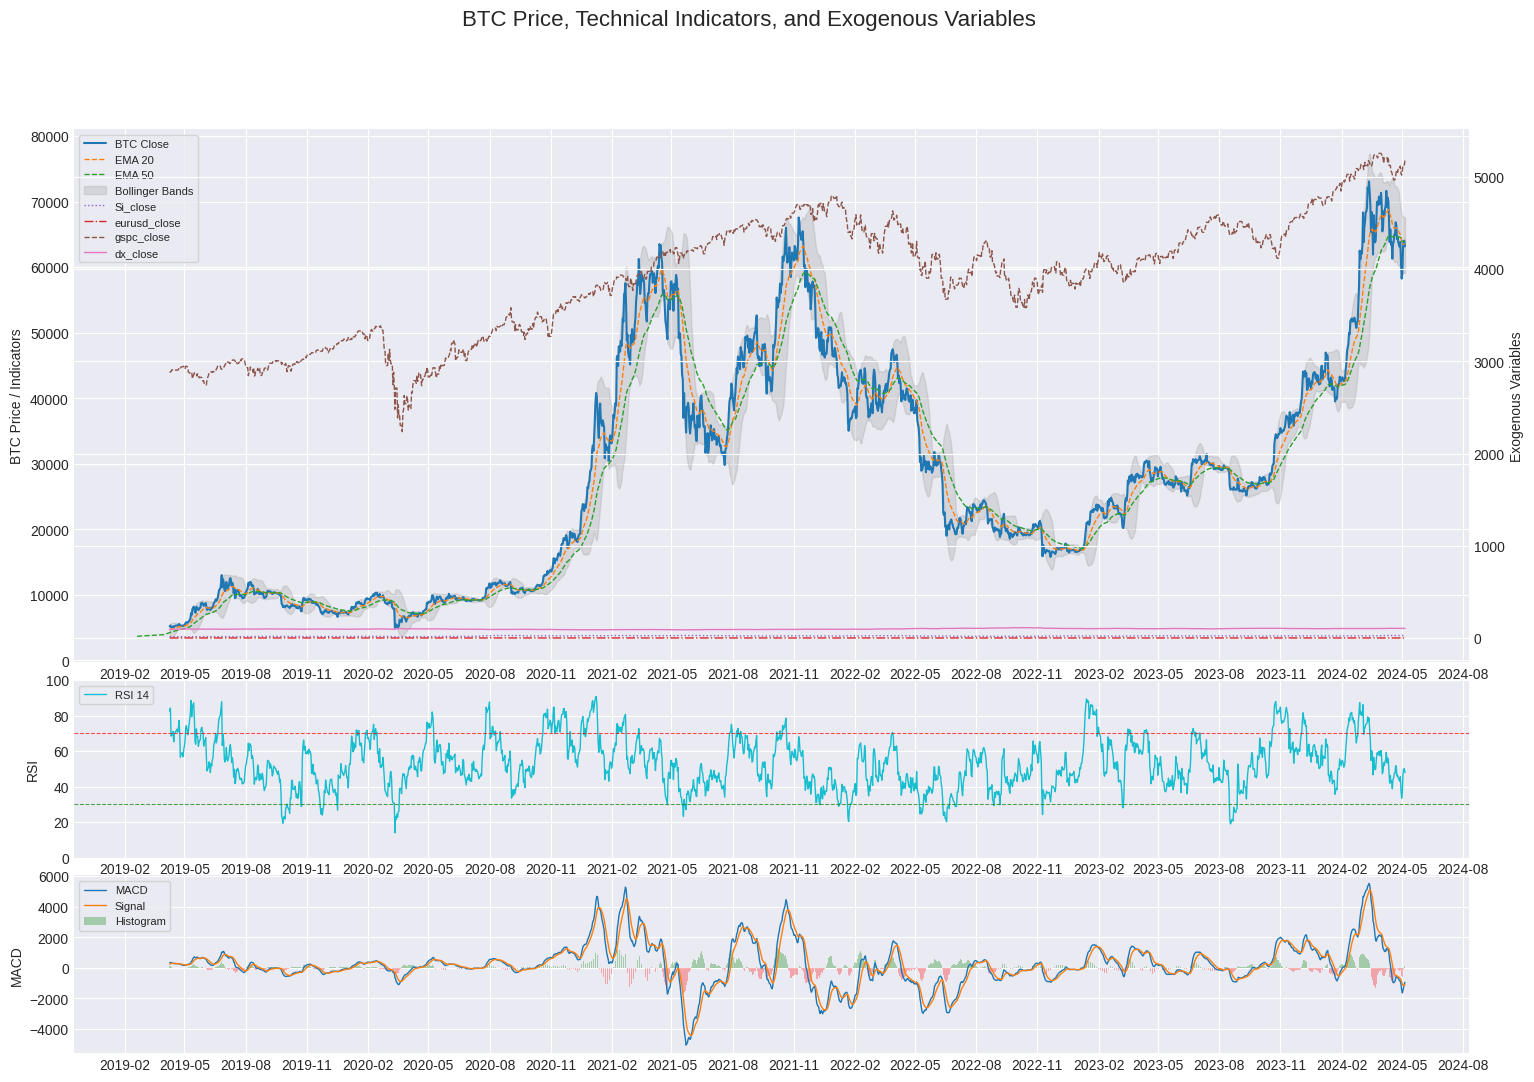

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
import numpy as np

def plot_technical_analysis(df_model):
    """Visualize BTC price, technical indicators, and multiple exogenous variables."""
    plt.style.use('seaborn-v0_8-darkgrid')
    fig = plt.figure(figsize=(18, 12), dpi=100)
    gs = GridSpec(3, 1, height_ratios=[3, 1, 1], hspace=0.06)

    # --- Main Price and Technical Indicators ---
    ax1 = fig.add_subplot(gs[0])
    ax1.plot(df_model.index, df_model['close'], label='BTC Close', color='#1f77b4', lw=1.5)
    ax1.plot(df_model.index, df_model['EMA20'], label='EMA 20', color='#ff7f0e', ls='--', lw=1)
    ax1.plot(merged.index, merged['EMA50'], label='EMA 50', color='#2ca02c', ls='--', lw=1)
    ax1.fill_between(df_model.index, df_model['bb_bbl'], df_model['bb_bbh'], color='gray', alpha=0.2, label='Bollinger Bands')

    # --- Exogenous Variables on Secondary Y-Axis ---
    ax1b = ax1.twinx()
    exog_vars = [
        ('Si_close', '#9467bd', ':'),
        ('eurusd_close', '#d62728', '-.'),
        ('gspc_close', '#8c564b', '--'),
        ('dx_close', '#e377c2', '-')
    ]
    for col, color, style in exog_vars:
        if col in df_model.columns:
            ax1b.plot(df_model.index, df_model[col], label=col, color=color, lw=1, ls=style)

    # --- RSI Subplot ---
    ax2 = fig.add_subplot(gs[1], sharex=ax1)
    ax2.plot(df_model.index, df_model['RSI14'], label='RSI 14', color='#17becf', lw=1)
    ax2.axhline(70, color='red', ls='--', lw=0.75, alpha=0.7)
    ax2.axhline(30, color='green', ls='--', lw=0.75, alpha=0.7)
    ax2.set_ylim(0, 100)
    ax2.set_ylabel('RSI')
    ax2.legend(loc='upper left', fontsize=8, frameon=True)

    # --- MACD Subplot ---
    ax3 = fig.add_subplot(gs[2], sharex=ax1)
    ax3.plot(df_model.index, df_model['MACD'], label='MACD', color='#1f77b4', lw=1)
    ax3.plot(df_model.index, df_model['MACD_Signal'], label='Signal', color='#ff7f0e', lw=1)
    ax3.bar(df_model.index, df_model['MACD_Histogram'],
            color=np.where(df_model['MACD_Histogram'] > 0, 'g', 'r'),
            alpha=0.3, label='Histogram')
    ax3.set_ylabel('MACD')
    ax3.legend(loc='upper left', fontsize=8, frameon=True)

    # --- Formatting and Legends ---
    ax1.set_ylabel('BTC Price / Indicators')
    ax1b.set_ylabel('Exogenous Variables')
    ax1.set_xlabel('Date')
    for ax in [ax1, ax2, ax3]:
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

    # Combine legends from both y-axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1b.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=8, frameon=True)

    plt.suptitle('BTC Price, Technical Indicators, and Exogenous Variables', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


# Usage
plot_technical_analysis(df_model)

**Convert the DataFrame to a CSV file for archival and future modeling applications** (optional)

In [ ]:
# Convert the DataFrame with imputed technical indicators to CSV file

# saving the df DataFrame which should now contain the imputed data
df_model.to_csv('XGBoostBTC.csv', index=True) # Set index=True if you want the date index in the CSV

print("CSV file has been created!")

CSV file has been created!


**9. Model Implemetation**

In [ ]:
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
#data=df_model.copy()

In [ ]:
data=pd.read_csv('XGBoostBTC.csv', parse_dates=['date'], index_col='date')
data

,open,high,low,close,volume,eurusd_close,Si_close,gspc_close,dx_close,RSI14,sma7,sma25,sma99,EMA20,EMA50,bb_bbm,bb_bbh,bb_bbl,MACD,MACD_Histogram,MACD_Signal
date,,,,,,,,,,,,,,,,,,,,,
2019-04-09,5289.92,5289.92,5167.42,5204.96,14722104361,1.13,15.17,2878.20,96.61,82.48,5097.99,4380.61,3905.69,4622.47,4250.53,4462.50,5500.66,3424.35,333.22,93.45,239.77
2019-04-10,5204.11,5421.65,5193.38,5324.55,15504590933,1.13,15.20,2888.21,96.56,84.20,5148.21,4431.64,3920.65,4689.34,4292.64,4527.26,5612.18,3442.34,346.96,85.75,261.21
2019-04-11,5325.08,5354.23,5017.30,5064.49,16555616019,1.13,14.82,2888.32,96.81,68.43,5168.45,4473.21,3931.98,4725.06,4322.91,4579.29,5662.38,3496.20,333.02,57.45,275.57
2019-04-12,5061.20,5103.27,4955.85,5089.54,13675206312,1.13,14.92,2907.41,96.60,69.03,5176.00,4515.49,3944.63,4759.78,4352.98,4631.98,5706.23,3557.72,320.30,35.78,284.52
2019-04-13,5088.85,5127.12,5061.59,5096.59,10823289598,1.13,14.92,2907.41,96.60,69.21,5181.26,4556.51,3957.15,4791.85,4382.14,4685.70,5738.80,3632.59,307.25,18.19,289.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-02,58253.70,59602.30,56937.20,59123.43,32711813559,1.07,26.58,5064.20,105.18,36.40,61734.73,64724.55,59936.71,63509.46,63938.89,63474.95,67849.64,59100.26,-1643.75,-585.69,-1058.06
2024-05-03,59122.30,63320.50,58848.31,62889.84,33172023048,1.07,26.44,5127.79,104.92,47.30,61611.09,64374.89,60168.59,63450.45,63897.75,63428.37,67807.36,59049.38,-1480.85,-338.23,-1142.61
2024-05-04,62891.03,64494.96,62599.35,63891.47,20620477992,1.07,26.44,5127.79,104.92,49.76,61678.57,64164.99,60391.57,63492.45,63897.51,63336.01,67585.84,59086.18,-1256.44,-91.06,-1165.38


[0]	validation_0-rmse:20381.14452
[100]	validation_0-rmse:13166.82692
[200]	validation_0-rmse:8894.18917
[300]	validation_0-rmse:6337.75208
[400]	validation_0-rmse:4868.36959
[500]	validation_0-rmse:3986.76904
[600]	validation_0-rmse:3489.02117
[700]	validation_0-rmse:3202.94994
[800]	validation_0-rmse:3032.43405
[900]	validation_0-rmse:2932.85793
[1000]	validation_0-rmse:2879.02265
[1100]	validation_0-rmse:2848.92407
[1200]	validation_0-rmse:2832.40474
[1300]	validation_0-rmse:2820.73417
[1400]	validation_0-rmse:2813.21190
[1500]	validation_0-rmse:2810.18429
[1600]	validation_0-rmse:2805.57147
[1700]	validation_0-rmse:2803.33632
[1800]	validation_0-rmse:2804.15139
[1900]	validation_0-rmse:2804.39242
[1999]	validation_0-rmse:2806.27016

Base Model Performance:
MAE: 1777.40
R²: 0.96
MAPE: 3.82%
*Intuitive model accuracy: 96.18%


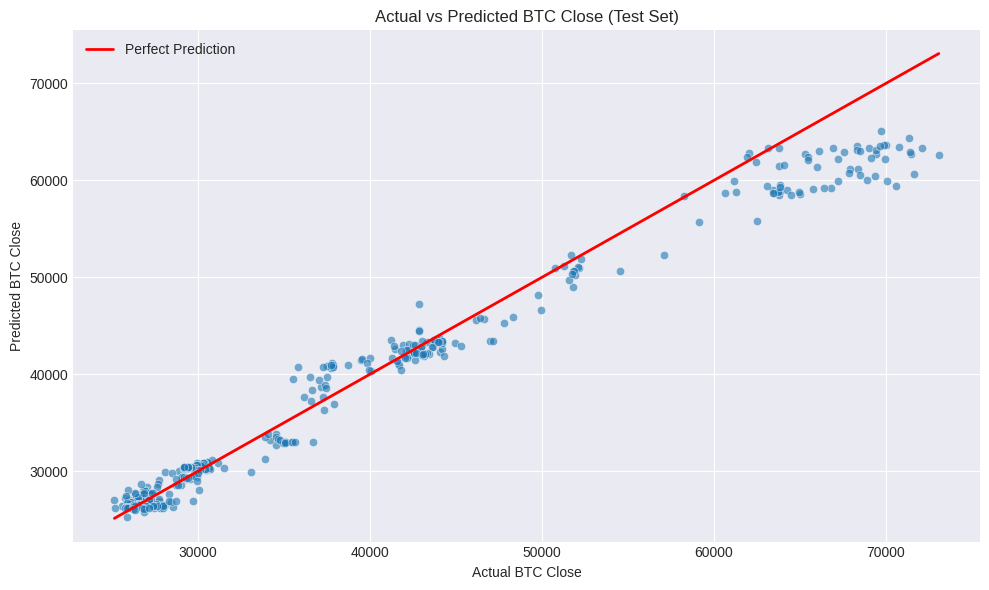


Running SHAP analysis...


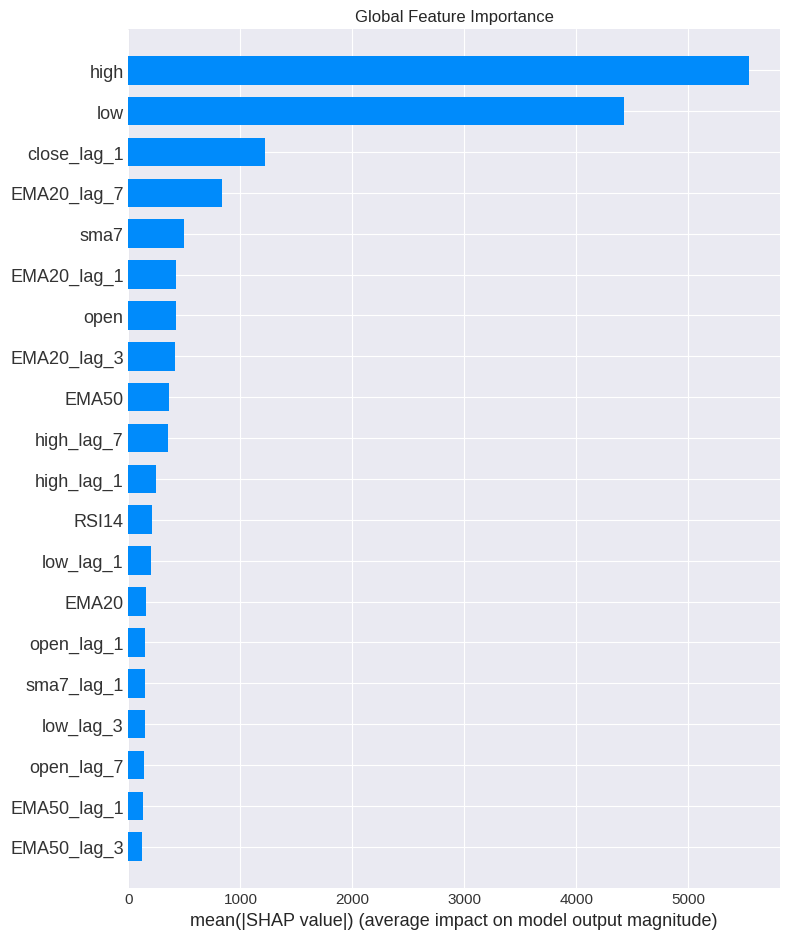

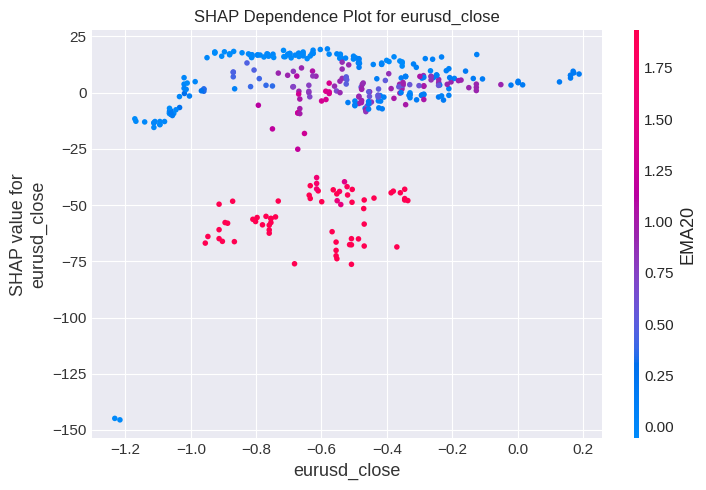

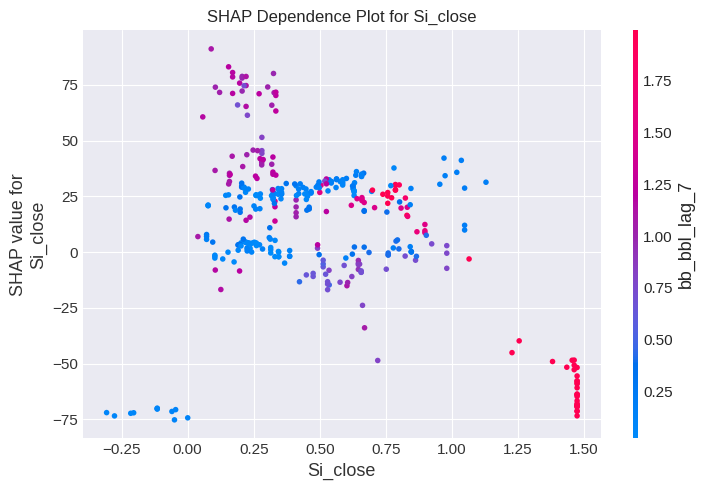

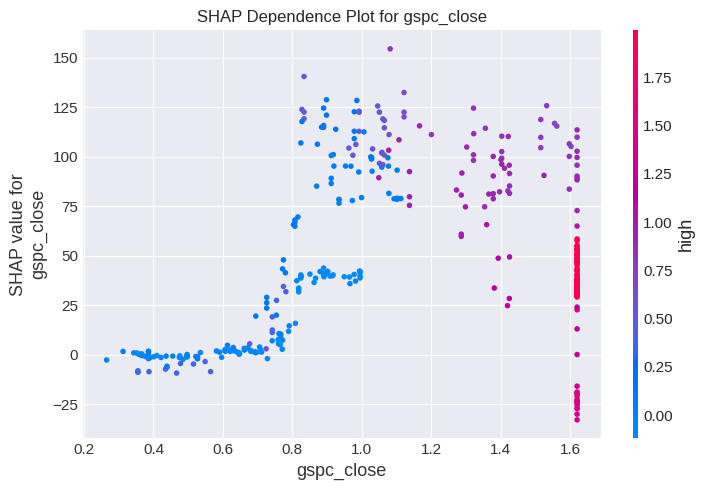

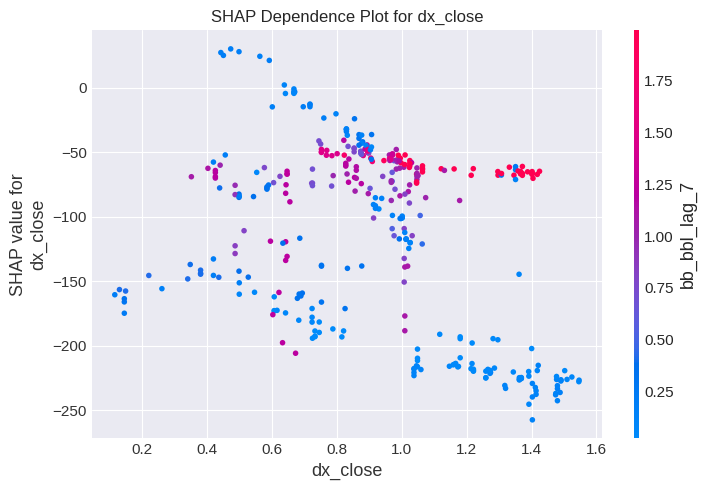

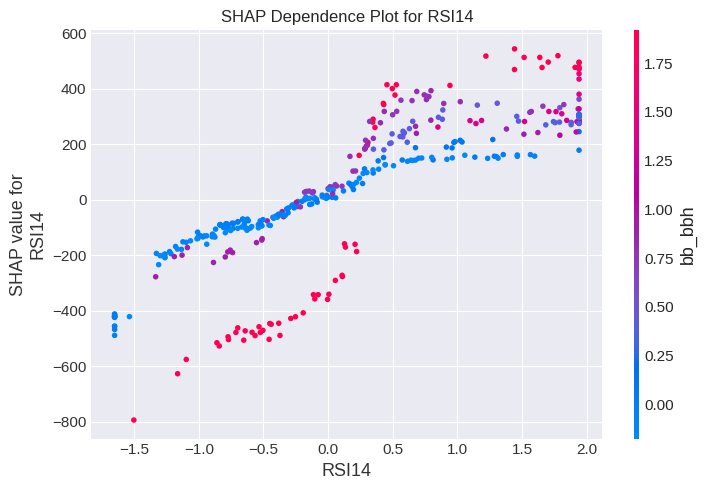

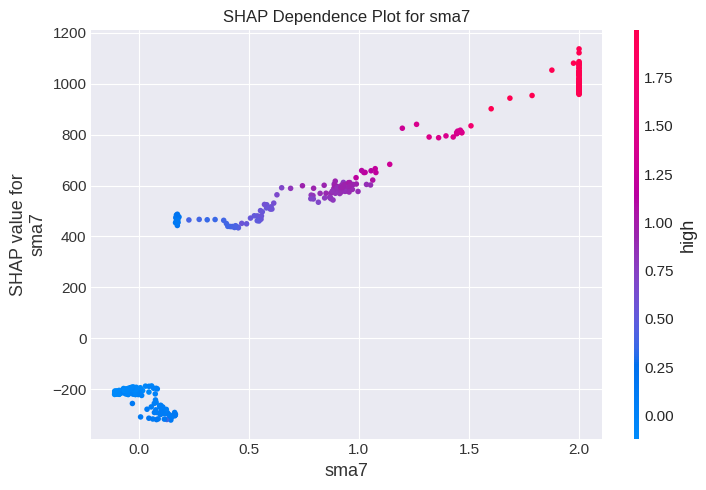

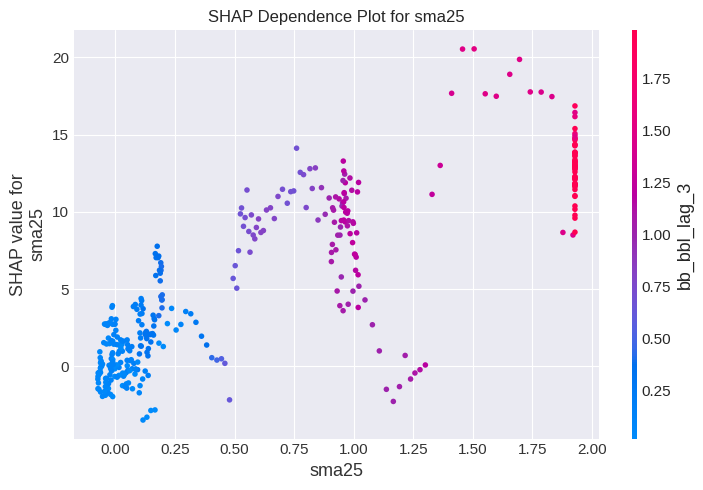

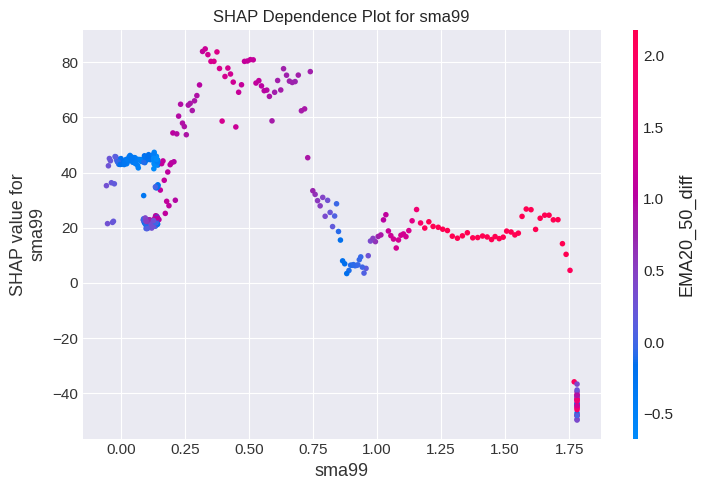

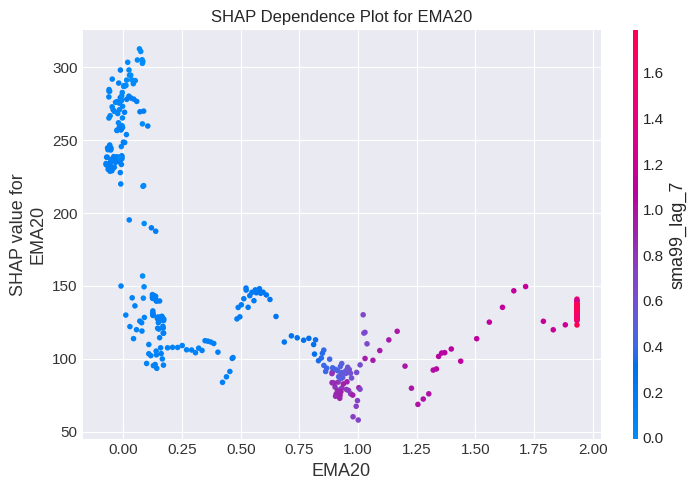

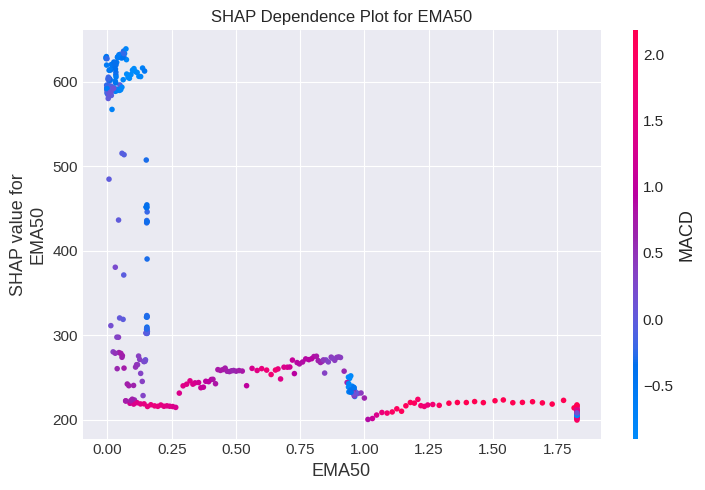

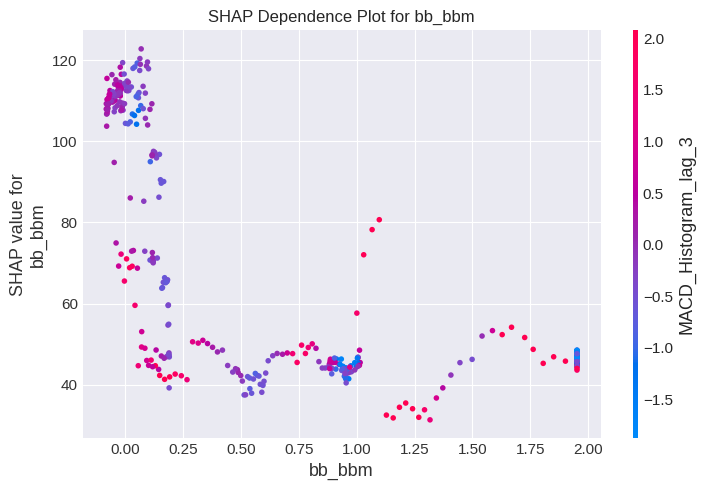

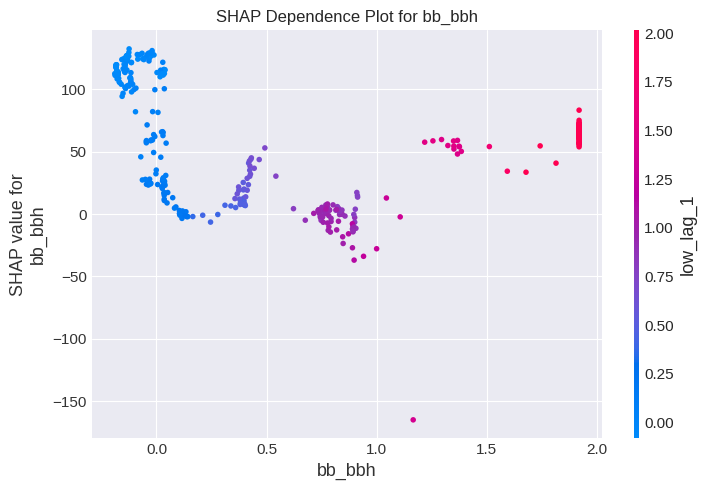

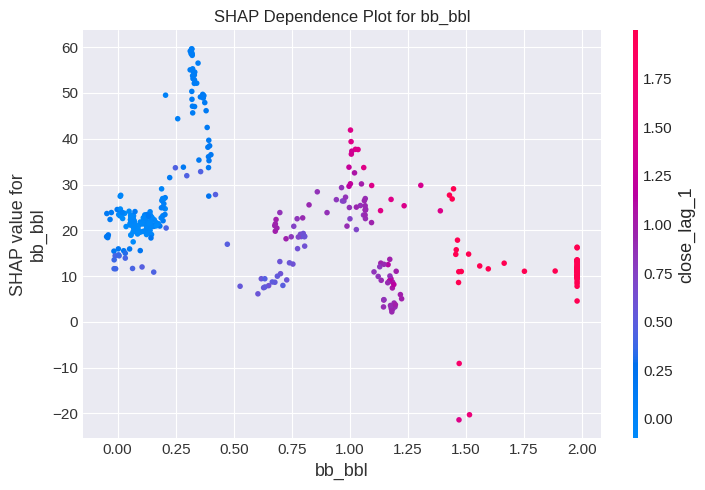

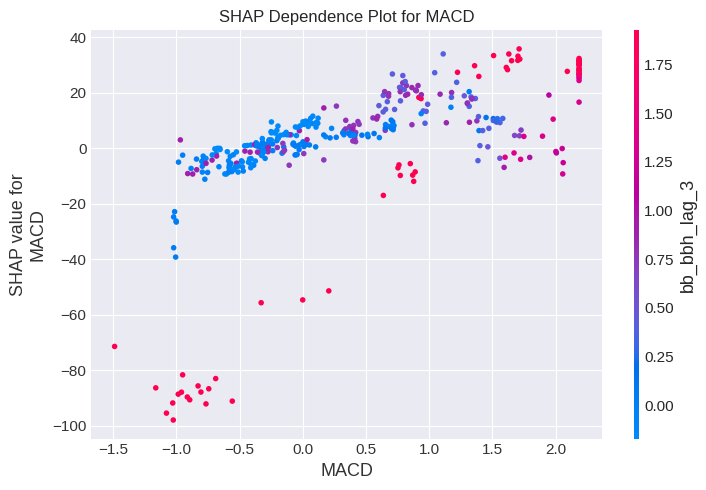

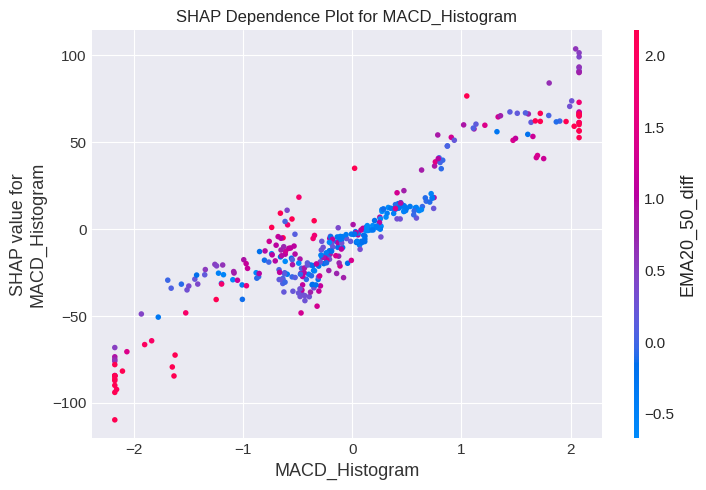

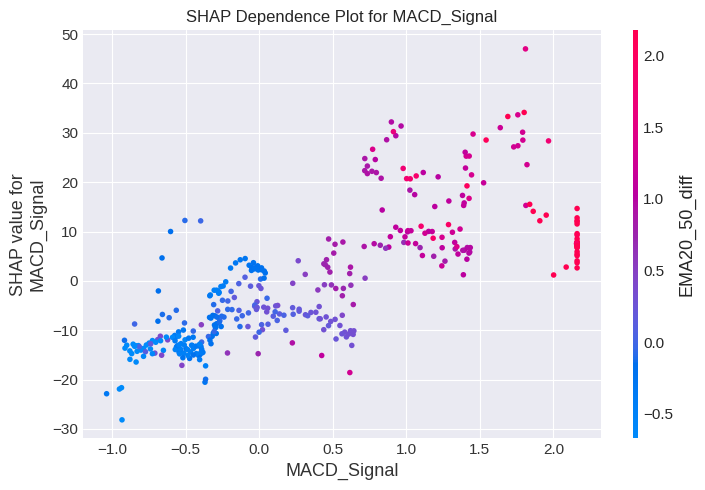


Training hybrid forecaster...


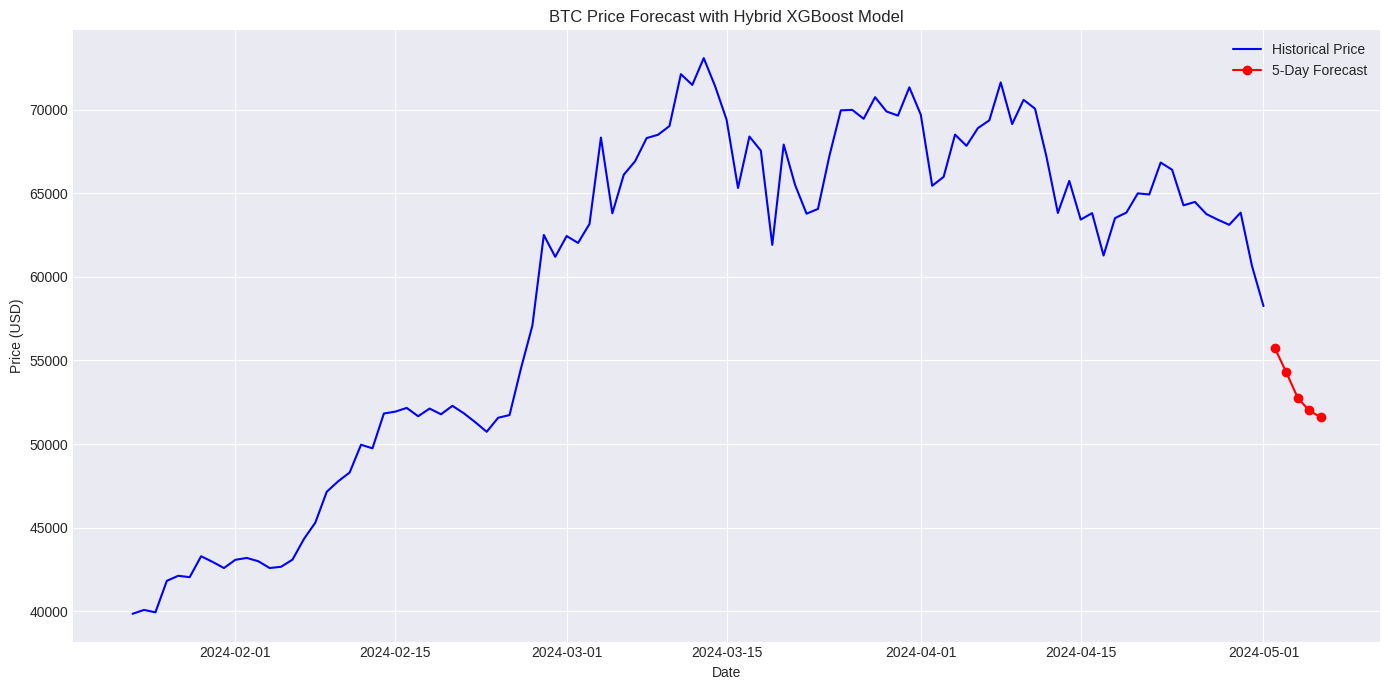


5-Day BTC Price Forecast:
        date  Predicted BTC Price
0 2024-05-02             55725.51
1 2024-05-03             54287.08
2 2024-05-04             52759.74
3 2024-05-05             52008.70
4 2024-05-06             51597.91


In [ ]:
data=pd.read_csv('XGBoostBTC.csv', parse_dates=['date'], index_col='date')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from xgboost import XGBRegressor

# ---------------------------
# 1. Data Preparation & Feature Engineering
# ---------------------------
def prepare_features(data, lags=[1,3,7], forecast_horizon=5):
    """Feature engineering pipeline for time series."""
    lag_features = [
        'open', 'high', 'low', 'close', 'volume',
        'eurusd_close', 'Si_close', 'gspc_close', 'dx_close',
        'RSI14', 'sma7', 'sma25', 'sma99', 'EMA20', 'EMA50',
        'bb_bbm', 'bb_bbh', 'bb_bbl', 'MACD', 'MACD_Histogram', 'MACD_Signal'
    ]
    for lag in lags:
        for feature in lag_features:
            data[f'{feature}_lag_{lag}'] = data[feature].shift(lag)
    data['EMA20_50_diff'] = data['EMA20'] - data['EMA50']
    data['MACD_Cross'] = np.where(data['MACD'] > data['MACD_Signal'], 1, -1)
    for step in range(1, forecast_horizon+1):
        data[f'Target_t+{step}'] = data['close'].shift(-step)
    data.dropna(inplace=True)
    return data

# ---------------------------
# 2. Preprocessing with Outlier Handling
# ---------------------------
def robust_scaling(df, features):
    """Outlier-resistant scaling for features."""
    X = df[features]
    scaler = StandardScaler()
    quantiles = X.quantile([0.05, 0.95])
    X_clipped = X.clip(lower=quantiles.loc[0.05], upper=quantiles.loc[0.95], axis=1)
    X_scaled = scaler.fit_transform(X_clipped)
    return X_scaled, scaler, X.columns

# ---------------------------
# 3. Hybrid Forecasting Class
# ---------------------------
# Move the HybridForecaster class definition OUTSIDE the if __name__ == "__main__": block
class HybridForecaster:
    def __init__(self, base_model, horizon=5, lags=[1,3,7]):
        self.base_model = base_model
        self.horizon = horizon
        self.lags = lags
        self.models = []
        self.feature_cols = None

    def fit(self, X, y):
        self.models = []
        for step in range(self.horizon):
            model = XGBRegressor(**self.base_model.get_params())
            model.fit(X, y[:, step])
            self.models.append(model)

    def predict(self, X_last):
        preds = []
        X_current = X_last.copy()
        for model in self.models:
            y_pred = model.predict(X_current.reshape(1, -1))[0]
            preds.append(y_pred)
            # Update lag features (only for 'close' lags)
            for lag in self.lags:
                col_name = f'close_lag_{lag}'
                if col_name in self.feature_cols:
                    idx = self.feature_cols.get_loc(col_name)
                    if lag == 1:
                        X_current[idx] = y_pred
                    else:
                        prev_col = f'close_lag_{lag-1}'
                        if prev_col in self.feature_cols:
                            prev_idx = self.feature_cols.get_loc(prev_col)
                            X_current[idx] = X_current[prev_idx]
        return preds

# ---------------------------
# 4. Main Execution Pipeline
# ---------------------------
if __name__ == "__main__":
    # Load and prepare data
    data = pd.read_csv('XGBoostBTC.csv', parse_dates=['date'], index_col='date')
    data = prepare_features(data)
    if data.empty:
        raise ValueError("Data preprocessing resulted in empty DataFrame")

    # Define features and targets
    forecast_horizon = 5
    target_cols = [f'Target_t+{i+1}' for i in range(forecast_horizon)]
    features = data.columns.difference(target_cols + ['close'])
    if len(features) == 0:
        raise ValueError("No features available after preprocessing")

    X, scaler, feature_cols = robust_scaling(data, features)
    y = data[target_cols].values

    # Temporal split
    train_size = int(len(X) * 0.8)
    if train_size <= 0 or train_size >= len(X):
        raise ValueError(f"Invalid train size: {train_size} for dataset length {len(X)}")
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Train base model for t+1 prediction
    base_model = XGBRegressor(
        n_estimators=2000,
        learning_rate=0.005,
        max_depth=7,
        subsample=0.7,
        colsample_bytree=0.6,
        gamma=0.5,
        reg_alpha=0.1,
        reg_lambda=0.1,
        tree_method='gpu_hist',
        random_state=42
    )
    base_model.fit(X_train, y_train[:, 0], eval_set=[(X_test, y_test[:, 0])], verbose=100)

    # Evaluate base model
    predictions = base_model.predict(X_test)
    print("\nBase Model Performance:")
    print(f"MAE: {mean_absolute_error(y_test[:, 0], predictions):.2f}")
    print(f"R²: {r2_score(y_test[:, 0], predictions):.2f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_test[:, 0], predictions)*100:.2f}%")
    accuracy = 100 - mean_absolute_percentage_error(y_test[:, 0], predictions) * 100
    print(f"*Intuitive model accuracy: {accuracy:.2f}%")


    # Actual vs Predicted Plot
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=y_test[:, 0], y=predictions, alpha=0.6)
    plt.plot([y_test[:, 0].min(), y_test[:, 0].max()],
             [y_test[:, 0].min(), y_test[:, 0].max()],
             color='red', lw=2, label='Perfect Prediction')
    plt.title('Actual vs Predicted BTC Close (Test Set)')
    plt.xlabel('Actual BTC Close')
    plt.ylabel('Predicted BTC Close')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # SHAP Analysis
    try:
        print("\nRunning SHAP analysis...")
        explainer = shap.TreeExplainer(base_model)
        X_test_df = pd.DataFrame(X_test, columns=feature_cols)
        shap_values = explainer.shap_values(X_test_df)
        shap.summary_plot(shap_values, X_test_df, plot_type='bar', show=False)
        plt.title('Global Feature Importance')
        plt.tight_layout()
        plt.show()
        # Dependence plots for key features
        dependence_features = [
            'eurusd_close', 'Si_close', 'gspc_close', 'dx_close', 'RSI14',
            'sma7', 'sma25', 'sma99', 'EMA20', 'EMA50',
            'bb_bbm', 'bb_bbh', 'bb_bbl',
            'MACD', 'MACD_Histogram', 'MACD_Signal'
        ]
        for feature in dependence_features:
            if feature in X_test_df.columns:
                shap.dependence_plot(feature, shap_values, X_test_df, show=False)
                plt.title(f'SHAP Dependence Plot for {feature}')
                plt.tight_layout()
                plt.show()
    except Exception as e:
        print(f"SHAP error: {e}")

    # --- Hybrid Forecasting ---
    try:
        print("\nTraining hybrid forecaster...")
        # forecaster is already defined in the global scope now
        forecaster = HybridForecaster(base_model, horizon=forecast_horizon)
        forecaster.feature_cols = feature_cols
        forecaster.fit(X_train, y_train)
        # Generate future predictions
        last_observation = X[-1]
        future_preds = forecaster.predict(last_observation)
        # Visualization
        plt.figure(figsize=(14, 7))
        plt.plot(data.index[-100:], data['close'].iloc[-100:],
                 label='Historical Price', color='blue')
        future_dates = pd.date_range(start=data.index[-1],
                                    periods=forecast_horizon+1, freq='D')[1:]
        plt.plot(future_dates, future_preds, marker='o',
                 label=f'{forecast_horizon}-Day Forecast', color='red')
        plt.title('BTC Price Forecast with Hybrid XGBoost Model')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Hybrid forecasting failed: {e}")



# Or, as a DataFrame for a nicer display:
forecast_df = pd.DataFrame({
    'date': future_dates,
    'Predicted BTC Price': future_preds
})
print("\n5-Day BTC Price Forecast:")
print(forecast_df)


***intuitive model accuracy**  Some businesses or analysts may subtract MAPE from 100 for reporting purposes, calling it **"mean absolute percent accuracy" or "MAPA,"** but this is **not an industry-recognized or mathematically rigorous term**.
while it provides a **rough estimate of how close, on average, predictions are to the actual values in percentage terms**, it should not be confused with the standard accuracy metric used in classification problems (which is typically the proportion of correct predictions out of all predictions)

**END OF NOTEBOOK**

IF having difficulty running base model (**error:Deprecated GPU Method**) due to No Visible GPU, modify initialization  **base model** in code with:




base_model = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.005,
    tree_method="hist",  *# Use "hist" for CPU or GPU*
    device="cuda",  *# Ensure it explicitly uses CUDA*
    eval_metric="rmse",
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)




**this will result in**

Base Model Performance:
MAE: 2102.44
R²: 0.95
MAPE: 4.40%